**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importing Dataset**

In [2]:
data = pd.read_csv("/content/dataset_after_full_preprocessig.csv")

In [54]:
data.head()


,Date,TC,TdC,Hr,ddd,ffkmh,Precmm,P0hPa,Prechrs,Nt,Nh,HKm,Viskm,Prec_rate,Classification
0,11/3/2022 12:00,30.5,14.2,37.0,7,18.5,0.0,888.006897,6,5.0,5.0,0.6,30.0,0.0,2
1,23/06/2022 15:00,24.5,18.2,68.0,9,18.5,0.0,884.400000,3,7.0,1.0,0.6,15.0,0.0,2
2,21/06/2021 15:00,29.7,16.8,46.0,5,3.7,0.0,904.100000,3,2.0,1.0,0.6,10.0,0.0,1
3,10/10/2020 12:00,26.3,17.4,58.0,1,9.3,0.0,885.300000,6,3.0,2.0,0.6,10.0,0.0,2
4,16/08/2022 15:00,23.0,19.6,81.0,9,11.1,0.0,887.900000,3,7.0,2.0,0.3,20.0,0.0,2


In [55]:
data.shape

(22264, 15)

In [5]:
data.columns

Index(['Date', 'TC', 'TdC', 'Hr', 'ddd', 'ffkmh', 'Precmm', 'P0hPa', 'Prechrs',
       'Nt', 'Nh', 'HKm', 'Viskm', 'Prec_rate', 'Classification'],
      dtype='object')

**Extract Numerical**

In [6]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['TC',
 'TdC',
 'Hr',
 'ffkmh',
 'Precmm',
 'P0hPa',
 'Prechrs',
 'Nt',
 'Nh',
 'HKm',
 'Viskm',
 'Prec_rate',
 'Classification']

In [7]:
num_data = data[num_features]
num_data.head()

,TC,TdC,Hr,ffkmh,Precmm,P0hPa,Prechrs,Nt,Nh,HKm,Viskm,Prec_rate,Classification
0,30.5,14.2,37.0,18.5,0.0,888.006897,6,5.0,5.0,0.6,30.0,0.0,2
1,24.5,18.2,68.0,18.5,0.0,884.400000,3,7.0,1.0,0.6,15.0,0.0,2
2,29.7,16.8,46.0,3.7,0.0,904.100000,3,2.0,1.0,0.6,10.0,0.0,1
3,26.3,17.4,58.0,9.3,0.0,885.300000,6,3.0,2.0,0.6,10.0,0.0,2
4,23.0,19.6,81.0,11.1,0.0,887.900000,3,7.0,2.0,0.3,20.0,0.0,2


In [8]:
num_data['Classification'].unique()

array([2, 1, 0, 3])

**Check target class balance**

In [9]:
num_data.Classification.value_counts()

Classification
2    14467
1     7756
0       40
3        1
Name: count, dtype: int64

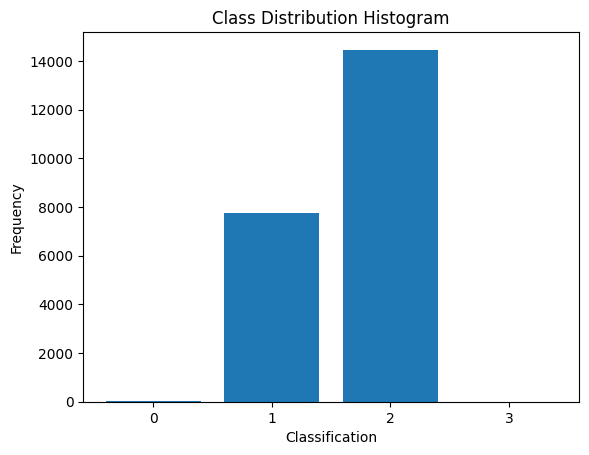

In [50]:
import matplotlib.pyplot as plt

class_counts = num_data['Classification'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.title('Class Distribution Histogram')
plt.xticks(class_counts.index)
plt.show()


**Balancing data and separate the dependent and independent features**

In [19]:
# Remove instances belonging to class 0 and 3
filtered = num_data[(num_data['Classification'] != 0) & (num_data['Classification'] != 3)]

# Separate features and target variable
X_filtered = filtered.drop(columns=['Classification'])
y_filtered = filtered['Classification']


In [20]:
filtered['Classification'].unique()

array([2, 1])

**Apply under sampling to balance the classes**

In [21]:
# Import the necessary libraries
from imblearn.under_sampling import RandomUnderSampler

In [22]:
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

In [32]:
# Balancing the data
X_resampled, y_X_resampled = rus.fit_resample(X_filtered, y_filtered)

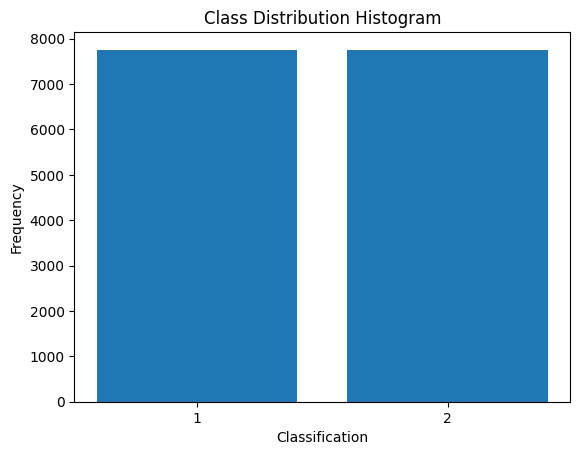

In [51]:
import matplotlib.pyplot as plt


class_counts = y_X_resampled.value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.title('Class Distribution Histogram')
plt.xticks(class_counts.index)
plt.show()


In [59]:
y_X_resampled.value_counts()

Classification
1    7756
2    7756
Name: count, dtype: int64

In [63]:
X_resampled.describe().T

,count,mean,std,min,25%,50%,75%,max
TC,15512.0,24.583118,3.657734,11.0,22.0,24.900000,27.200000,36.000000
TdC,15512.0,17.452521,2.370292,0.9,16.5,17.900000,18.900000,31.300000
Hr,15512.0,66.923366,16.891634,14.0,55.0,66.000000,80.000000,184.000000
ffkmh,15512.0,9.629887,9.138955,0.0,3.7,9.300000,13.000000,181.600000
Precmm,15512.0,1.134101,5.135578,0.0,0.0,0.000000,0.000000,106.000000
P0hPa,15512.0,888.538904,9.233041,180.5,884.5,888.006897,888.006897,1004.100000
Prechrs,15512.0,9.318528,8.811682,3.0,3.0,6.000000,24.000000,24.000000
Nt,15512.0,5.555682,1.933371,0.0,4.0,6.000000,7.000000,9.000000
Nh,15512.0,3.156460,1.850702,0.0,2.0,3.000000,4.000000,9.000000
HKm,15512.0,0.684209,0.488900,0.0,0.6,0.600000,0.600000,2.500000


**Splitting Dataset**

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_X_resampled,train_size=0.8,random_state=0)

In [37]:
#Import Libraries
from sklearn.preprocessing import StandardScaler

In [38]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)

In [40]:
#Make sure both arrays have correct dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12409, 12)
(12409, 1)
(3103, 12)
(3103,)


**Building ANN**

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [42]:
#initializing ann
model = Sequential()
#adding the first input layer and the first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=(12)))
#add hidden layer with dropout
model.add(Dense(units=24, activation='relu'))
model.add(Dropout(.2))
#add  hidden layer with dropout
model.add(Dense(units=11, activation='relu'))
model.add(Dropout(.2))
#add  hidden layer
model.add(Dense(units=8, activation='relu'))
#add an output layer ( 4 classes in the target variable )
model.add(Dense(units=4, activation='softmax'))
#compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

**Train the model**

In [43]:
model.fit(X_train, y_train, epochs=100, batch_size=30)

Epoch 1/100
414/414 [==============================] - 2s 2ms/step - loss: 0.7093 - accuracy: 0.6219
Epoch 2/100
414/414 [==============================] - 1s 2ms/step - loss: 0.5348 - accuracy: 0.7074
Epoch 3/100
414/414 [==============================] - 1s 2ms/step - loss: 0.4907 - accuracy: 0.7440
Epoch 4/100
414/414 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7601
Epoch 5/100
414/414 [==============================] - 1s 2ms/step - loss: 0.4410 - accuracy: 0.7868
Epoch 6/100
414/414 [==============================] - 1s 2ms/step - loss: 0.4256 - accuracy: 0.8020
Epoch 7/100
414/414 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8147
Epoch 8/100
414/414 [==============================] - 1s 3ms/step - loss: 0.3917 - accuracy: 0.8230
Epoch 9/100
414/414 [==============================] - 1s 3ms/step - loss: 0.3807 - accuracy: 0.8300
Epoch 10/100
414/414 [==============================] - 1s 3ms/step - loss: 0.3700 - accura

In [44]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

97/97 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9152
Accuracy of model is 0.9152433276176453


**Print the actual and predicted values**

In [45]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

97/97 [==============================] - 1s 3ms/step


array([1, 2, 2, ..., 2, 2, 2])

In [46]:
results_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred
})

# Display the DataFrame
results_df

,Actual Value,Predicted Value
4462,1,1
7799,2,2
12381,2,2
5274,1,1
167,1,1
...,...,...
660,1,1
6439,1,2
8960,2,2
4291,1,2


In [47]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

97/97 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.9152
Accuracy of model is 0.9152433276176453


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92      1535
           2       0.93      0.90      0.91      1568

    accuracy                           0.92      3103
   macro avg       0.92      0.92      0.92      3103
weighted avg       0.92      0.92      0.92      3103



In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                275       
                                                                 
 dropout_1 (Dropout)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 96        
                                                                 
 dense_4 (Dense)             (None, 4)                 3